In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Image Manipulation

## Modifying Image Pixels

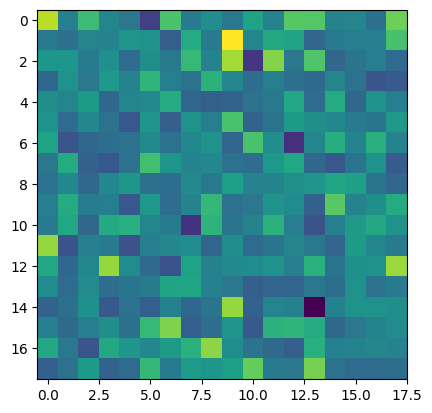

In [3]:
# Load image
img = cv.imread("images/18x18.png", cv.IMREAD_GRAYSCALE)

plt.imshow(img)

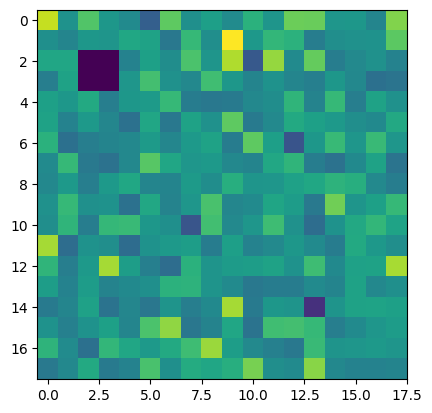

In [4]:
# Modify Image
img[2,2] = 0
img[2,3] = 0
img[3,2] = 0
img[3,3] = 0

plt.imshow(img)

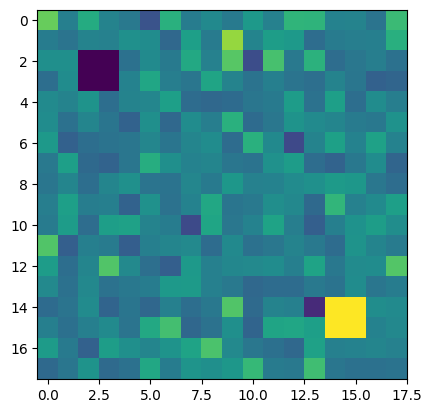

In [5]:
# Modify image again
img[15,15] = 255
img[15,14] = 255
img[14,15] = 255
img[14,14] = 255

plt.imshow(img)

Note how the image was modified in-place! Always be careful to avoid making unwanted edits to image arrays!

## Cropping an Image

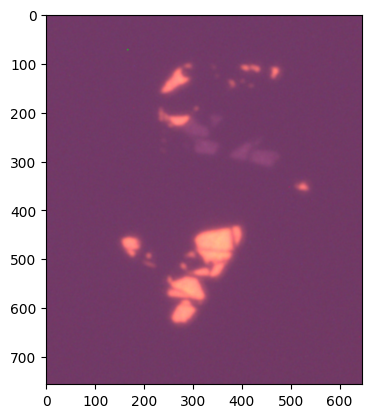

In [6]:
# Load image
tmds_bgr = cv.imread("images/TMDs.tif", cv.IMREAD_COLOR) # Load in BGR order
tmds_rgb = tmds_bgr[:,:,::-1]  # Reverse order of channels
plt.imshow(tmds_rgb)

Crop centre of frame

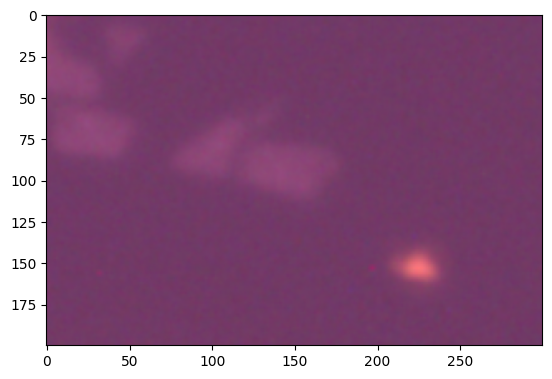

In [7]:
cropped_img = tmds_rgb[200:400, 300:600]
plt.imshow(cropped_img)

## Resizing Images
Use cv.resize https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d

### Method 1: Scaling factors
By setting the `dsize` argument of cv.resize to `None`, the image can be scaled using the scaling factors `(fx, fy)`

Image resized from: (756, 646, 3), to: (1512, 1292, 3)


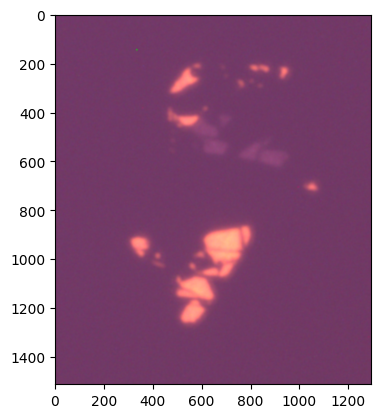

In [8]:
resized = cv.resize(tmds_rgb, dsize=None, fx=2, fy=2)

print(f"Image resized from: {tmds_rgb.shape}, to: {resized.shape}")
plt.imshow(resized)

### Method 2: Specify output size
Specifying the output width and height by passing the tuple `(new_x, new_y)` into the `dsize` argument

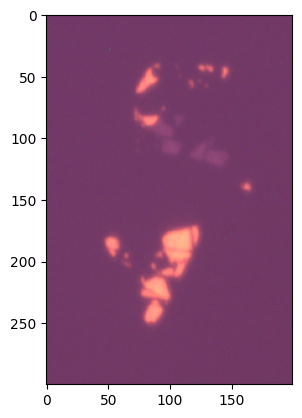

In [9]:
size = (width, height) = 200, 300

resized = cv.resize(tmds_rgb, dsize=size)
plt.imshow(resized)

### Resize to fit a certain width while maintaining aspect ratio

Original aspect Ratio: 0.8545, old shape: (756, 646, 3), new shape: (468, 400, 3), new aspect ratio: 0.8547


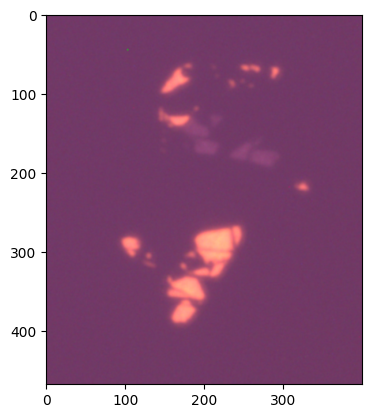

In [10]:
desired_width = 400
scale_factor = desired_width / tmds_rgb.shape[1]  # desired_width / width
new_height = int(tmds_rgb.shape[0] * scale_factor)  # height * scale_factor

resized = cv.resize(tmds_rgb, dsize=(desired_width, new_height))

print(f"Original aspect Ratio: {tmds_rgb.shape[1]/tmds_rgb.shape[0]:0.4f}, old shape: {tmds_rgb.shape}, new shape: {resized.shape}, new aspect ratio: {resized.shape[1]/resized.shape[0]:0.4f}")
plt.imshow(resized)

## Flipping Images
Using `cv.flip(img, flipcode:int)`
https://docs.opencv.org/3.4/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441

Flip codes:
```
 0 = flip by y axis
 1 = flip by x axis
-1 = flip by both
```

Text(0.5, 1.0, 'Flipped Both')

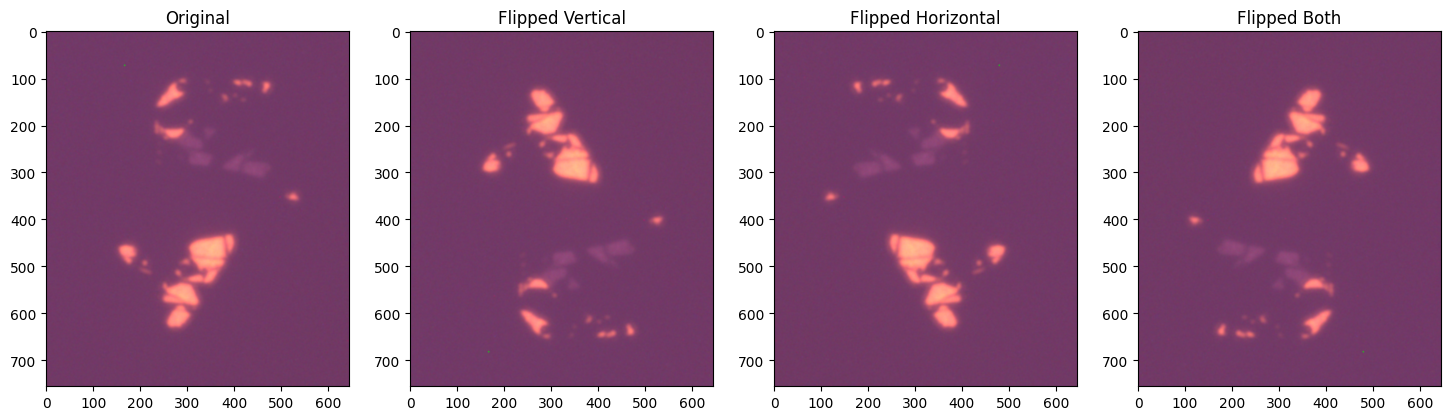

In [11]:
flipped_y = cv.flip(tmds_rgb, 0)
flipped_x = cv.flip(tmds_rgb, 1)
flipped_both = cv.flip(tmds_rgb, -1)

plt.figure(figsize=(18,5))
plt.subplot(141); plt.imshow(tmds_rgb); plt.title("Original")
plt.subplot(142); plt.imshow(flipped_y); plt.title("Flipped Vertical")
plt.subplot(143); plt.imshow(flipped_x); plt.title("Flipped Horizontal")
plt.subplot(144); plt.imshow(flipped_both); plt.title("Flipped Both")

## Image Annotation

### Drawing a Line
Use cv.line  https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2

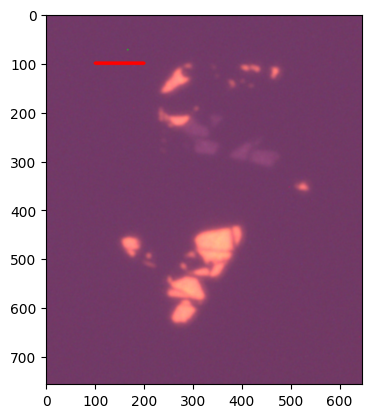

In [12]:
img = tmds_rgb.copy()  # Copy to avoid drawing on original image

line_colour = (255, 0, 0)  # 8-bit image so values range from: (0-255)
cv.line(img, (100, 100), (200, 100), line_colour, thickness=5, lineType=cv.LINE_AA)  # 2nd and 3rd arguments are the start and end point of the line respectively

plt.imshow(img)

### Drawing a circle
Use cv.circle  https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#gaf10604b069374903dbd0f0488cb43670

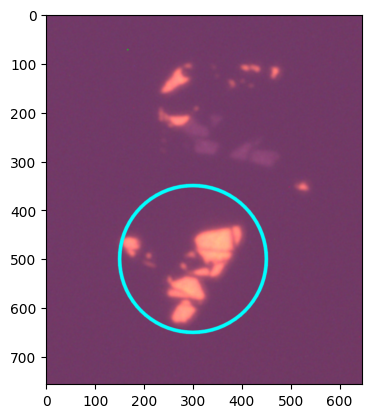

In [13]:
img = tmds_rgb.copy()  # Avoid drawing on original image

cv.circle(img, center=(300,500), radius=150, color=(0,255,255), thickness=5, lineType=cv.LINE_AA)

plt.imshow(img)

### Drawing a rectangle
Use cv.rectangle  https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga07d2f74cadcf8e305e810ce8eed13bc9

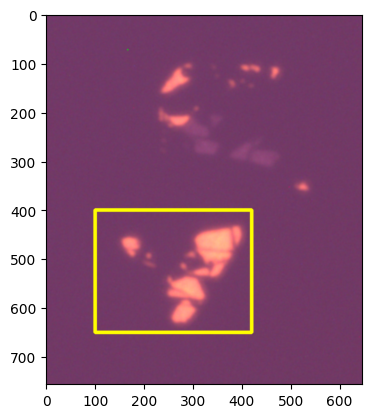

In [14]:
img = tmds_rgb.copy()

cv.rectangle(img, (100,400), (420, 650), color=(255,255,0), thickness=5, lineType=cv.LINE_AA)  # 2nd and 3rd arguments repesent top left and bottom right corner of the rectangle to draw 

plt.imshow(img)

## Drawing Text
use cv.pytText  https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576

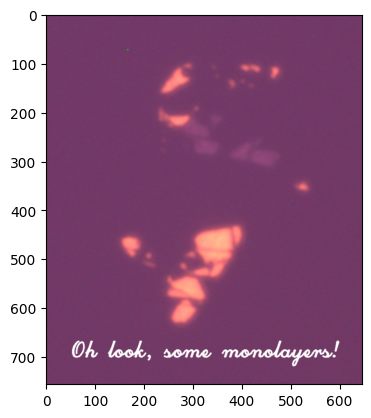

In [15]:
img = tmds_rgb.copy()

text:str = "Oh look, some monolayers!"
font = cv.FONT_HERSHEY_SCRIPT_COMPLEX
font_scale = 1.5
font_colour = (255, 255, 255)
font_thickness = 2

cv.putText(img, text, (50, 700), font, font_scale, font_colour, font_thickness, lineType=cv.LINE_AA)  # 3rd argument is the bottom left corner of the text

plt.imshow(img)